In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
file_path = 'environmental_factors.csv'
data = pd.read_csv(file_path)

# Convert `date` to datetime and set it as the index
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y %H:%M')
data.set_index('date', inplace=True)

# Replace invalid values (e.g., -9999) with NaN for handling
data.replace(-9999, np.nan, inplace=True)

# Impute Missing Values using Interpolation
data['wv'] = data['wv'].interpolate(method='time')
data['max. PAR'] = data['max. PAR'].interpolate(method='time')

# Outlier Detection and Handling (Capping using IQR)
def cap_outliers(df, column): by
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)

columns_to_cap = ['T', 'rh', 'rain', 'wv', 'max. PAR']
for col in columns_to_cap:
    cap_outliers(data, col)

# Feature Engineering (Adding Time-Based Features)
data['hour'] = data.index.hour
data['day'] = data.index.day
data['month'] = data.index.month
data['weekofyear'] = data.index.isocalendar().week

# Rolling averages for trend capture
data['T_roll_mean'] = data['T'].rolling(window=3).mean()
data['rh_roll_mean'] = data['rh'].rolling(window=3).mean()

# Drop rows with NaN introduced by rolling averages
data_cleaned = data.dropna()

# Split the data into features (X) and target variables (y)
X = data_cleaned.drop(['T', 'rh'], axis=1)
y_T = data_cleaned['T']  # Target variable for Temperature
y_rh = data_cleaned['rh']  # Target variable for Relative Humidity

# Split into training and test sets
X_train, X_test, y_train_T, y_test_T = train_test_split(X, y_T, test_size=0.2, random_state=42, shuffle=False)
X_train, X_test, y_train_rh, y_test_rh = train_test_split(X, y_rh, test_size=0.2, random_state=42, shuffle=False)

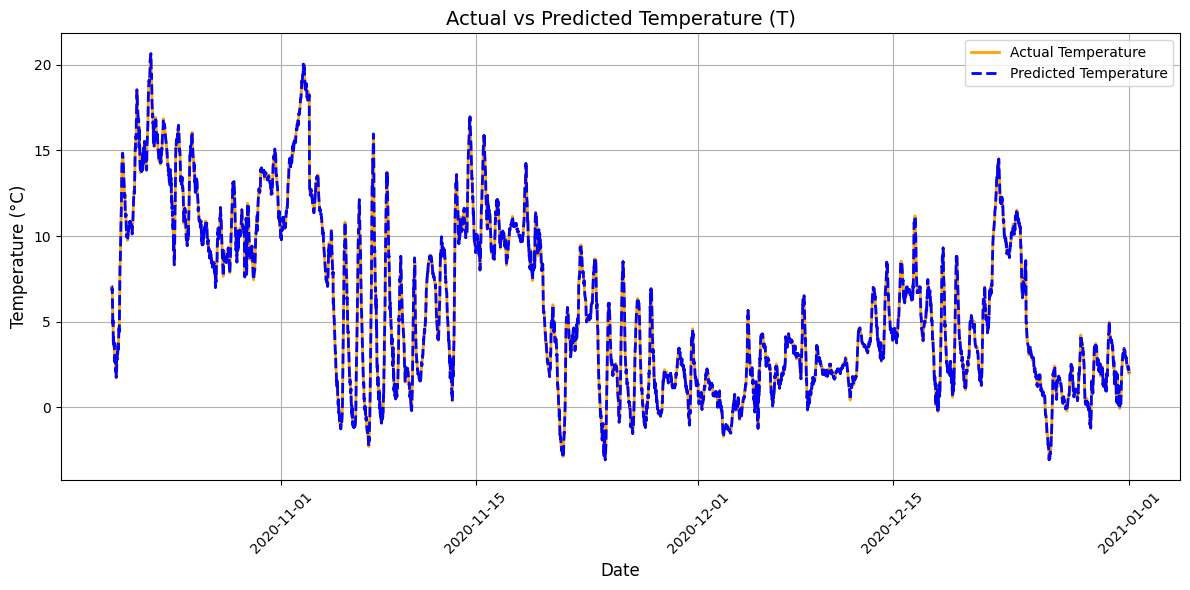

Random Forest Regressor - Temperature Prediction:
Temperature R2: 0.9999986209033196
Temperature MSE: 3.431075149444883e-05
Temperature Accuracy: 0.9982920580700256
Temperature Precision: 0.9982990240987507
Temperature Recall: 0.9982920580700256
Temperature F1 Score: 0.9982910917836558

Predicted Relative Humidity values:
[78.2896 78.444  78.6273 ... 82.858  83.4616 82.4768]


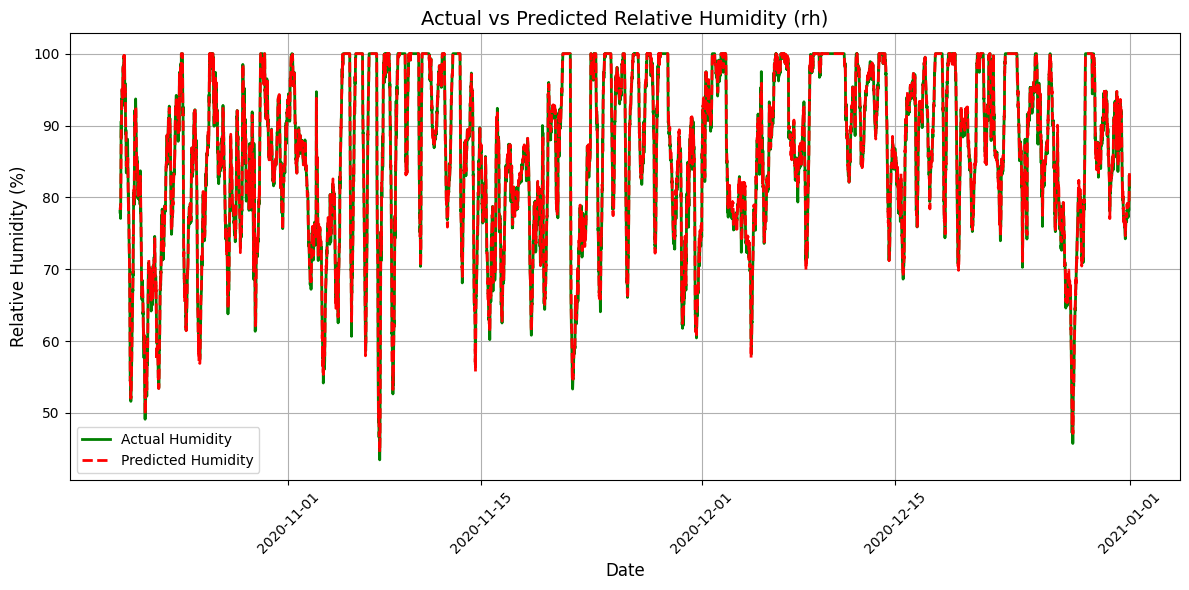


Random Forest Regressor - Humidity Prediction:
Humidity R2: 0.9954194483678886
Humidity MSE: 0.613499378403075
Humidity Accuracy: 0.9551190815067844
Humidity Precision: 0.9549192694690517
Humidity Recall: 0.9551190815067844
Humidity F1 Score: 0.9549345917559495


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import KBinsDiscretizer

# Initialize the Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest Regressor model for Temperature prediction (T)
model_rf.fit(X_train, y_train_T)

# Predict Temperature (T) on test data
y_pred_T_rf = model_rf.predict(X_test)

# Print predicted values for Temperature
print("Predicted Temperature values:")
print(y_pred_T_rf)

# Evaluate the performance of Temperature prediction
r2_T_rf = r2_score(y_test_T, y_pred_T_rf)
mse_T_rf = mean_squared_error(y_test_T, y_pred_T_rf)

# Optional: Discretize the continuous values to categories (bins) for classification metrics
binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
y_test_T_binned = binner.fit_transform(y_test_T.values.reshape(-1, 1)).flatten()
y_pred_T_binned = binner.transform(y_pred_T_rf.reshape(-1, 1)).flatten()

# Calculate classification metrics: accuracy, precision, recall, f1-score
accuracy_T = accuracy_score(y_test_T_binned, y_pred_T_binned)
precision_T = precision_score(y_test_T_binned, y_pred_T_binned, average='weighted', zero_division=1)
recall_T = recall_score(y_test_T_binned, y_pred_T_binned, average='weighted', zero_division=1)
f1_T = f1_score(y_test_T_binned, y_pred_T_binned, average='weighted', zero_division=1)

# Plot Actual vs Predicted Temperature
plt.figure(figsize=(12, 6))
plt.plot(y_test_T.index, y_test_T, label='Actual Temperature', color='orange', linewidth=2)
plt.plot(y_test_T.index, y_pred_T_rf, label='Predicted Temperature', color='blue', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Temperature (T)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print results for Temperature prediction
print("Random Forest Regressor - Temperature Prediction:")
print(f"Temperature R2: {r2_T_rf}")
print(f"Temperature MSE: {mse_T_rf}")
print(f"Temperature Accuracy: {accuracy_T}")
print(f"Temperature Precision: {precision_T}")
print(f"Temperature Recall: {recall_T}")
print(f"Temperature F1 Score: {f1_T}")

# Train the model for Relative Humidity prediction (rh)
model_rf_rh = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_rh.fit(X_train, y_train_rh)

# Predict Relative Humidity (rh) on test data
y_pred_rh_rf = model_rf_rh.predict(X_test)

# Print predicted values for Humidity
print("\nPredicted Relative Humidity values:")
print(y_pred_rh_rf)

# Evaluate the performance of Relative Humidity prediction
r2_rh_rf = r2_score(y_test_rh, y_pred_rh_rf)
mse_rh_rf = mean_squared_error(y_test_rh, y_pred_rh_rf)

# Optional: Discretize the continuous values to categories (bins) for classification metrics
y_test_rh_binned = binner.fit_transform(y_test_rh.values.reshape(-1, 1)).flatten()
y_pred_rh_binned = binner.transform(y_pred_rh_rf.reshape(-1, 1)).flatten()

# Calculate classification metrics: accuracy, precision, recall, f1-score for humidity
accuracy_rh = accuracy_score(y_test_rh_binned, y_pred_rh_binned)
precision_rh = precision_score(y_test_rh_binned, y_pred_rh_binned, average='weighted', zero_division=1)
recall_rh = recall_score(y_test_rh_binned, y_pred_rh_binned, average='weighted', zero_division=1)
f1_rh = f1_score(y_test_rh_binned, y_pred_rh_binned, average='weighted', zero_division=1)

# Plot Actual vs Predicted Relative Humidity
plt.figure(figsize=(12, 6))
plt.plot(y_test_rh.index, y_test_rh, label='Actual Humidity', color='green', linewidth=2)
plt.plot(y_test_rh.index, y_pred_rh_rf, label='Predicted Humidity', color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Relative Humidity (rh)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Relative Humidity (%)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print results for Humidity prediction
print("\nRandom Forest Regressor - Humidity Prediction:")
print(f"Humidity R2: {r2_rh_rf}")
print(f"Humidity MSE: {mse_rh_rf}")
print(f"Humidity Accuracy: {accuracy_rh}")
print(f"Humidity Precision: {precision_rh}")
print(f"Humidity Recall: {recall_rh}")
print(f"Humidity F1 Score: {f1_rh}")


In [ ]:
from joblib import dump
dump(model_rf, 'envipar.joblib')


['envipar.joblib']

In [ ]:
dump(model_rf_rh, 'envipar1.joblib')

['envipar1.joblib']